<a href="https://colab.research.google.com/github/firarru/Project-Tracer-Study/blob/main/Tracer_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LOADING DATASET & EDA**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('https://github.com/firarru/Project-Tracer-Study/raw/main/Dataset/Data%20Capstone.xlsx')
df

,Program Studi,Keterampilan yang dikuasai,Tingkat Keterampilan,Relevansi Keahlian dg Pekerjaan,Relevansi Etika dg Pekerjaan,Relevansi Kompetensi Bhs. Inggris dg Pekerjaan,Relevansi Kompetensi Komunikasi dg Pekerjaan,Relevansi Kemampuan Kerja Sama Tim dg Pekerjaan,Sektor Pekerjaan,Lama Tunggu Kerja,Relevansi Prodi dg Pekerjaan,Relevansi Kurikulum Prodi dg Pekerjaan,Relevansi Kurikulum Magang dg Pekerjaan,Relevansi Praktikum dg Pekerjaan
0,S1 Teknologi Informasi,UX/Design,Cukup Tinggi,Rendah,Tinggi,Cukup Tinggi,Cukup Tinggi,Cukup Tinggi,Pendidikan,14,Cukup Erat,Cukup Besar,Cukup Besar,Cukup Besar
1,S1 Teknik Industri,Career Management,Cukup Tinggi,Tinggi,Tinggi,Cukup Tinggi,Tinggi,Tinggi,Pendidikan,-1,Cukup Erat,Cukup Besar,Besar,Besar
2,S1 Rekayasa Perangkat Lunak,Phyton (Programming Language),Tinggi,Sangat Tinggi,Sangat Tinggi,Cukup Tinggi,Sangat Tinggi,Sangat Tinggi,Pemrograman,8,Sangat Erat,Sangat Besar,Sangat Besar,Besar
3,S1 Rekayasa Perangkat Lunak,Project Management,Cukup Tinggi,Tinggi,Tinggi,Cukup Tinggi,Tinggi,Tinggi,Pendidikan,-4,Erat,Cukup Besar,Besar,Cukup Besar
4,S1 Rekayasa Perangkat Lunak,UX/Design,Cukup Tinggi,Cukup Tinggi,Tinggi,Cukup Tinggi,Cukup Tinggi,Cukup Tinggi,Transportasi,-1,Cukup Erat,Cukup Besar,Cukup Besar,Cukup Besar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,S1 Teknik Elektro,UX/Design,Cukup Tinggi,Cukup Tinggi,Cukup Tinggi,Cukup Tinggi,Cukup Tinggi,Cukup Tinggi,Industri Manufaktur,0,Cukup Erat,Cukup Besar,Cukup Besar,Cukup Besar
130,S1 Teknik Telekomunikasi,Interpersonal Communication,Cukup Tinggi,Cukup Tinggi,Cukup Tinggi,Cukup Tinggi,Cukup Tinggi,Cukup Tinggi,Biro jasa,-2,Cukup Erat,Cukup Besar,Cukup Besar,Cukup Besar
131,S1 Teknologi Informasi,UX/Design,Cukup Tinggi,Tinggi,Tinggi,Cukup Tinggi,Cukup Tinggi,Cukup Tinggi,Biro jasa,17,Sangat Erat,Cukup Besar,Cukup Besar,Cukup Besar
132,S1 Teknologi Informasi,Interpersonal Communication,Cukup Tinggi,Cukup Tinggi,Tinggi,Cukup Tinggi,Tinggi,Cukup Tinggi,Teknologi Digital,5,Erat,Cukup Besar,Besar,Cukup Besar


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 14 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Program Studi                                    134 non-null    object
 1   Keterampilan yang dikuasai                       134 non-null    object
 2   Tingkat Keterampilan                             134 non-null    object
 3   Relevansi Keahlian dg Pekerjaan                  134 non-null    object
 4   Relevansi Etika dg Pekerjaan                     134 non-null    object
 5   Relevansi Kompetensi Bhs. Inggris dg Pekerjaan   134 non-null    object
 6   Relevansi Kompetensi Komunikasi dg Pekerjaan     134 non-null    object
 7   Relevansi Kemampuan Kerja Sama Tim dg Pekerjaan  134 non-null    object
 8   Sektor Pekerjaan                                 134 non-null    object
 9   Lama Tunggu Kerja                          

In [4]:
df.describe()

,Lama Tunggu Kerja
count,134.000000
mean,3.261194
std,11.333581
min,-24.000000
25%,-2.000000
50%,2.000000
75%,6.000000
max,36.000000


In [5]:
df.duplicated().sum()

np.int64(0)

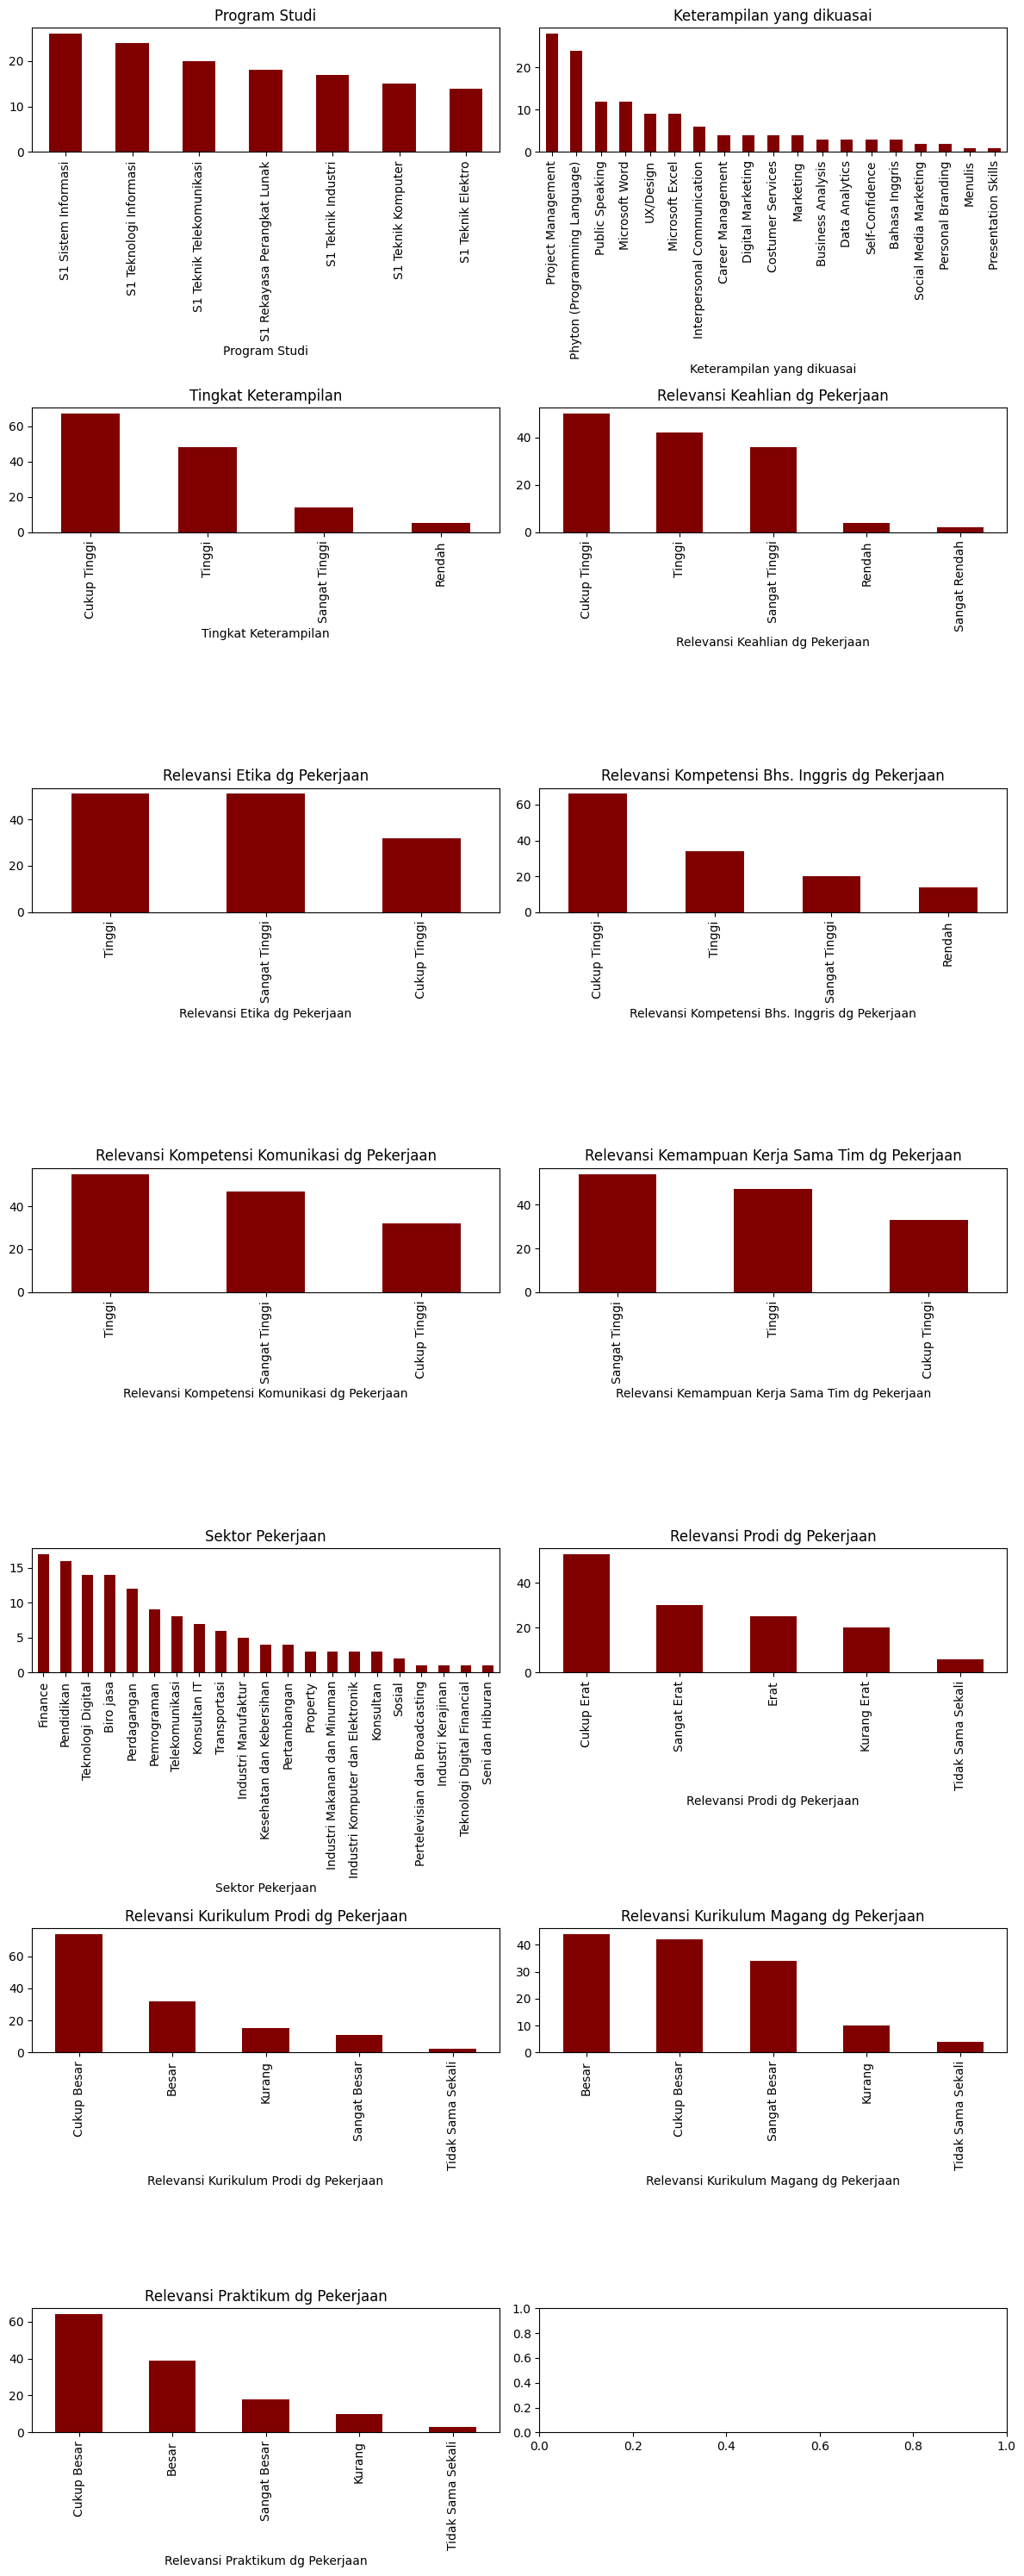

In [6]:
fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(12, 30))
axs = axs.flatten()

for i, col in enumerate(df.select_dtypes(exclude=['number']).columns):
    df[col].value_counts().plot(kind='bar', ax=axs[i], color='maroon')
    axs[i].set_title(col)
    axs[i].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

<Axes: >

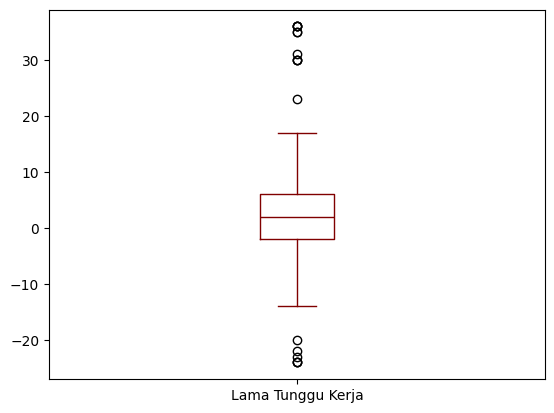

In [7]:
df['Lama Tunggu Kerja'].plot(kind='box', color='maroon')

<Axes: ylabel='Frequency'>

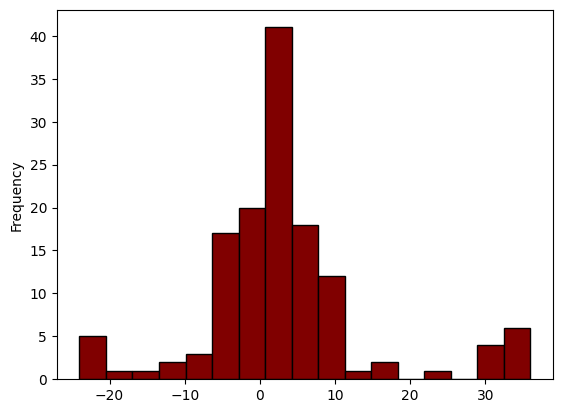

In [8]:
df['Lama Tunggu Kerja'].plot(kind='hist', bins=17, color='maroon', edgecolor='black')

# **PREPARATION**

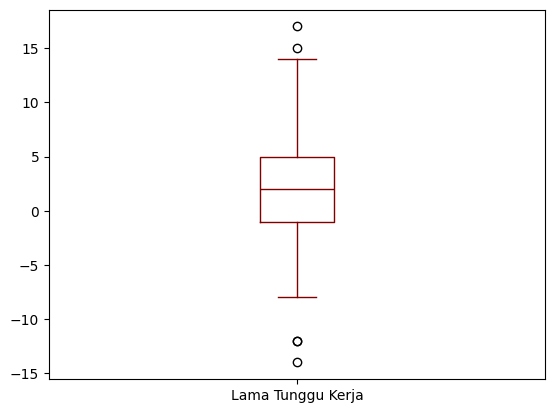

In [23]:
import matplotlib.pyplot as plt
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

df_no_outliers = remove_outliers_iqr(df, 'Lama Tunggu Kerja')

df_no_outliers['Lama Tunggu Kerja'].plot(kind='box', color='maroon')
plt.show()

## Transformation

In [9]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler

In [10]:
df.columns

Index(['Program Studi', 'Keterampilan yang dikuasai', 'Tingkat Keterampilan',
       'Relevansi Keahlian dg Pekerjaan', 'Relevansi Etika dg Pekerjaan',
       'Relevansi Kompetensi Bhs. Inggris dg Pekerjaan',
       'Relevansi Kompetensi Komunikasi dg Pekerjaan',
       'Relevansi Kemampuan Kerja Sama Tim dg Pekerjaan', 'Sektor Pekerjaan',
       'Lama Tunggu Kerja', 'Relevansi Prodi dg Pekerjaan',
       'Relevansi Kurikulum Prodi dg Pekerjaan',
       'Relevansi Kurikulum Magang dg Pekerjaan',
       'Relevansi Praktikum dg Pekerjaan'],
      dtype='object')

Encoding Ordinal karena fitur berisi data kategorik yang memiliki tingkatan

In [11]:
cat_tinggi = df[['Tingkat Keterampilan', 'Relevansi Keahlian dg Pekerjaan', 'Relevansi Etika dg Pekerjaan', 'Relevansi Kompetensi Bhs. Inggris dg Pekerjaan',
                 'Relevansi Kompetensi Komunikasi dg Pekerjaan', 'Relevansi Kemampuan Kerja Sama Tim dg Pekerjaan']]
cat_erat = df[['Relevansi Prodi dg Pekerjaan']]
cat_besar = df[['Relevansi Kurikulum Prodi dg Pekerjaan', 'Relevansi Kurikulum Magang dg Pekerjaan', 'Relevansi Praktikum dg Pekerjaan']]

df_ordinal = pd.concat([cat_tinggi, cat_erat, cat_besar], axis=1)

field_dict = {
  'field_tinggi' : ["Sangat Tinggi", "Tinggi", "Cukup Tinggi", "Rendah", "Sangat Rendah"],
  'field_erat' : ["Sangat Erat", "Erat", "Cukup Erat", "Kurang Erat", "Tidak Sama Sekali"],
  'field_besar' :["Sangat Besar", "Besar", "Cukup Besar", "Kurang", "Tidak Sama Sekali"]
}

kelompok_fitur = {
  'field_tinggi': cat_tinggi.columns,
  'field_erat': cat_erat.columns,
  'field_besar': cat_besar.columns
}

In [12]:
df_encode = df.copy()

for key, kolom in kelompok_fitur.items():
  OE = OrdinalEncoder(categories=[field_dict[key]]*len(kolom))
  df_encode[kolom] = OE.fit_transform(df[kolom])

Label Encoder untuk fitur dengan data kategorik nominal yang kemudian digunakan untuk analisis PCA

In [13]:
cat_label = ['Program Studi', 'Keterampilan yang dikuasai', 'Sektor Pekerjaan']
le = LabelEncoder()
for kolom in cat_label:
  df_encode[kolom] = le.fit_transform(df_encode[kolom])

In [14]:
df_encode.head()

,Program Studi,Keterampilan yang dikuasai,Tingkat Keterampilan,Relevansi Keahlian dg Pekerjaan,Relevansi Etika dg Pekerjaan,Relevansi Kompetensi Bhs. Inggris dg Pekerjaan,Relevansi Kompetensi Komunikasi dg Pekerjaan,Relevansi Kemampuan Kerja Sama Tim dg Pekerjaan,Sektor Pekerjaan,Lama Tunggu Kerja,Relevansi Prodi dg Pekerjaan,Relevansi Kurikulum Prodi dg Pekerjaan,Relevansi Kurikulum Magang dg Pekerjaan,Relevansi Praktikum dg Pekerjaan
0,6,18,2.0,3.0,1.0,2.0,2.0,2.0,10,14,2.0,2.0,2.0,2.0
1,3,2,2.0,1.0,1.0,2.0,1.0,1.0,10,-1,2.0,2.0,1.0,1.0
2,0,12,1.0,0.0,0.0,2.0,0.0,0.0,9,8,0.0,0.0,0.0,1.0
3,0,14,2.0,1.0,1.0,2.0,1.0,1.0,10,-4,1.0,2.0,1.0,2.0
4,0,18,2.0,2.0,1.0,2.0,2.0,2.0,20,-1,2.0,2.0,2.0,2.0


In [15]:
# num_fitur = ['Lama Tunggu Kerja']
df_encode = StandardScaler().fit_transform(df_encode)

In [16]:
df_encode = pd.DataFrame(df_encode, columns=df.columns)
df_encode.head()

,Program Studi,Keterampilan yang dikuasai,Tingkat Keterampilan,Relevansi Keahlian dg Pekerjaan,Relevansi Etika dg Pekerjaan,Relevansi Kompetensi Bhs. Inggris dg Pekerjaan,Relevansi Kompetensi Komunikasi dg Pekerjaan,Relevansi Kemampuan Kerja Sama Tim dg Pekerjaan,Sektor Pekerjaan,Lama Tunggu Kerja,Relevansi Prodi dg Pekerjaan,Relevansi Kurikulum Prodi dg Pekerjaan,Relevansi Kurikulum Magang dg Pekerjaan,Relevansi Praktikum dg Pekerjaan
0,1.404059,1.525263,0.725965,1.940539,0.183159,0.515406,1.463812,1.463502,0.144381,0.951076,0.353200,0.318960,0.686150,0.492677
1,-0.024882,-1.935228,0.725965,-0.226396,0.183159,0.515406,0.147364,0.198281,0.144381,-0.377390,0.353200,0.318960,-0.291979,-0.626284
2,-1.453823,0.227579,-0.644166,-1.309864,-1.108591,0.515406,-1.169085,-1.066940,-0.012912,0.419690,-1.432792,-2.123365,-1.270107,-0.626284
3,-1.453823,0.660140,0.725965,-0.226396,0.183159,0.515406,0.147364,0.198281,0.144381,-0.643084,-0.539796,0.318960,-0.291979,0.492677
4,-1.453823,1.525263,0.725965,0.857071,0.183159,0.515406,1.463812,1.463502,1.717310,-0.377390,0.353200,0.318960,0.686150,0.492677


## PCA

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA()
df_pca = pca.fit_transform(df_encode)

In [20]:
pca.explained_variance_ratio_

array([0.29141068, 0.12868785, 0.08162551, 0.07275448, 0.06694285,
       0.06613401, 0.063316  , 0.05350646, 0.04104468, 0.03654794,
       0.0295512 , 0.02683252, 0.02238679, 0.01925906])

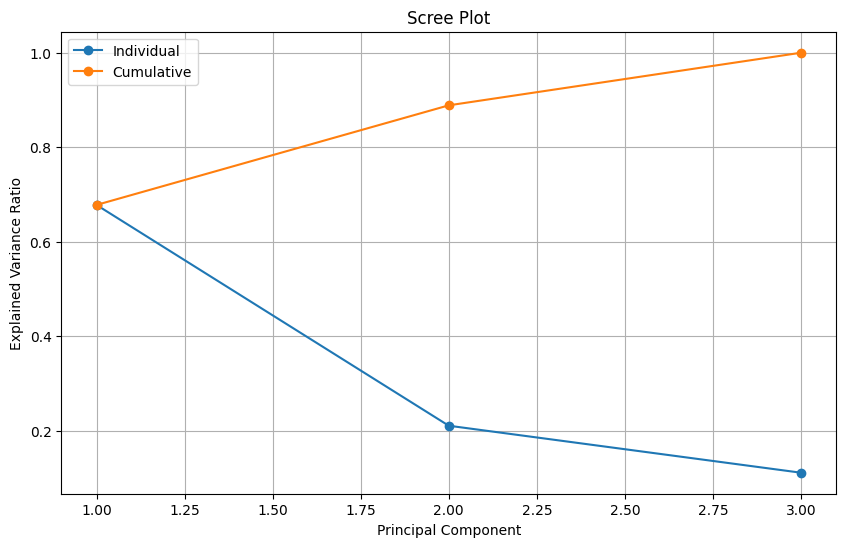

Explained Variance Ratio:
PC1: 0.6779 (67.79%)
PC2: 0.2108 (21.08%)
PC3: 0.1113 (11.13%)
Cumulative Explained Variance Ratio:
PC1 to PC1: 0.6779 (67.79%)
PC1 to PC2: 0.8887 (88.87%)
PC1 to PC3: 1.0 (100.0%)
Hasil transformasi PCA (5 data pertama):
         PC1        PC2       PC3
0  10.275487   2.359551  7.233952
1  -3.872120  -0.176369 -9.161121
2   4.613381   0.571962  1.524445
3  -7.459708   0.530678  2.744742
4  -5.517266  11.016179  5.932177
Loadings (korelasi variabel dengan masing-masing PC):
     PC1  PC2  PC3
PC1  1.0  0.0  0.0
PC2  0.0  1.0 -0.0
PC3  0.0  0.0  1.0


In [ ]:
# Variance ratio untuk setiap komponen
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Plot scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', label='Individual')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', label='Cumulative')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend()
plt.grid(True)
plt.show()

# Print explained variance per component
print("\
Explained Variance Ratio:")
for i, var in enumerate(explained_variance, start=1):
    print('PC' + str(i) + ': ' + str(round(var, 4)) + ' (' + str(round(var * 100, 2)) + '%)')

print("\
Cumulative Explained Variance Ratio:")
for i, var in enumerate(cumulative_variance, start=1):
    print('PC1 to PC' + str(i) + ': ' + str(round(var, 4)) + ' (' + str(round(var * 100, 2)) + '%)')

# Buat DataFrame untuk komponen PCA
pca_df = pd.DataFrame(df_pca, columns=['PC' + str(i) for i in range(1, df_pca.shape[1] + 1)])

print("\
Hasil transformasi PCA (5 data pertama):")
print(pca_df.head())

# Tampilkan loadings: korelasi antara variabel asli dengan principal components
loadings = pd.DataFrame(pca.components_.T, columns=['PC' + str(i) for i in range(1, df_pca.shape[1] + 1)], index=pca_df.columns)

print("\
Loadings (korelasi variabel dengan masing-masing PC):")
print(loadings)

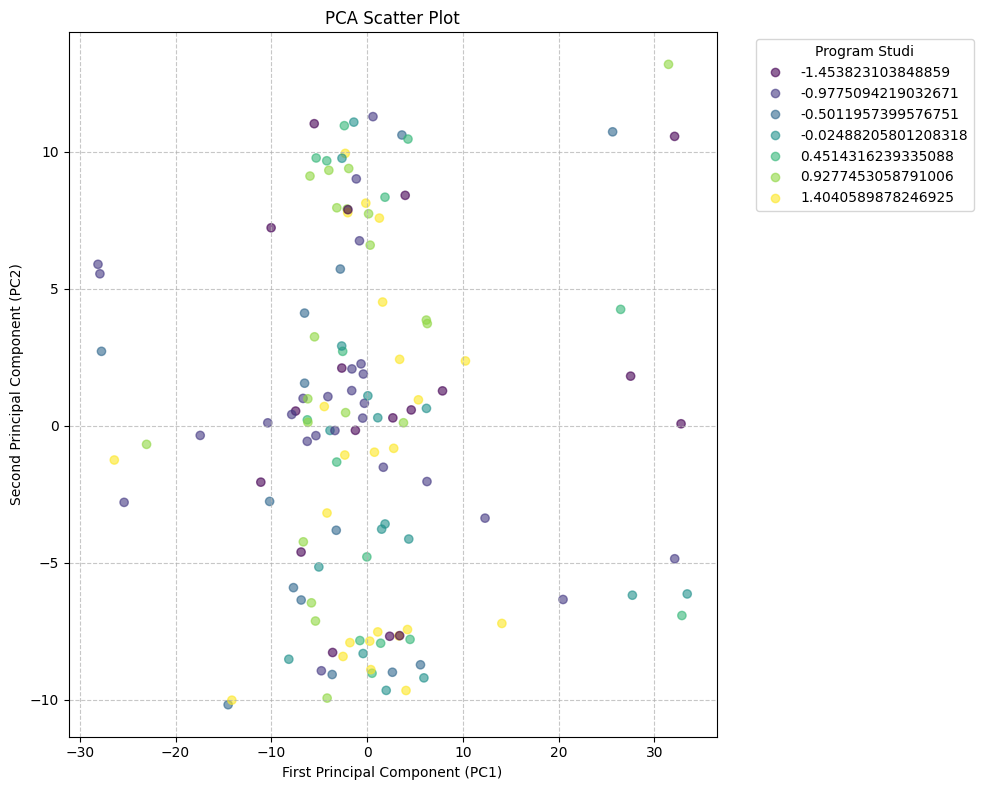

<Figure size 1200x1200 with 0 Axes>

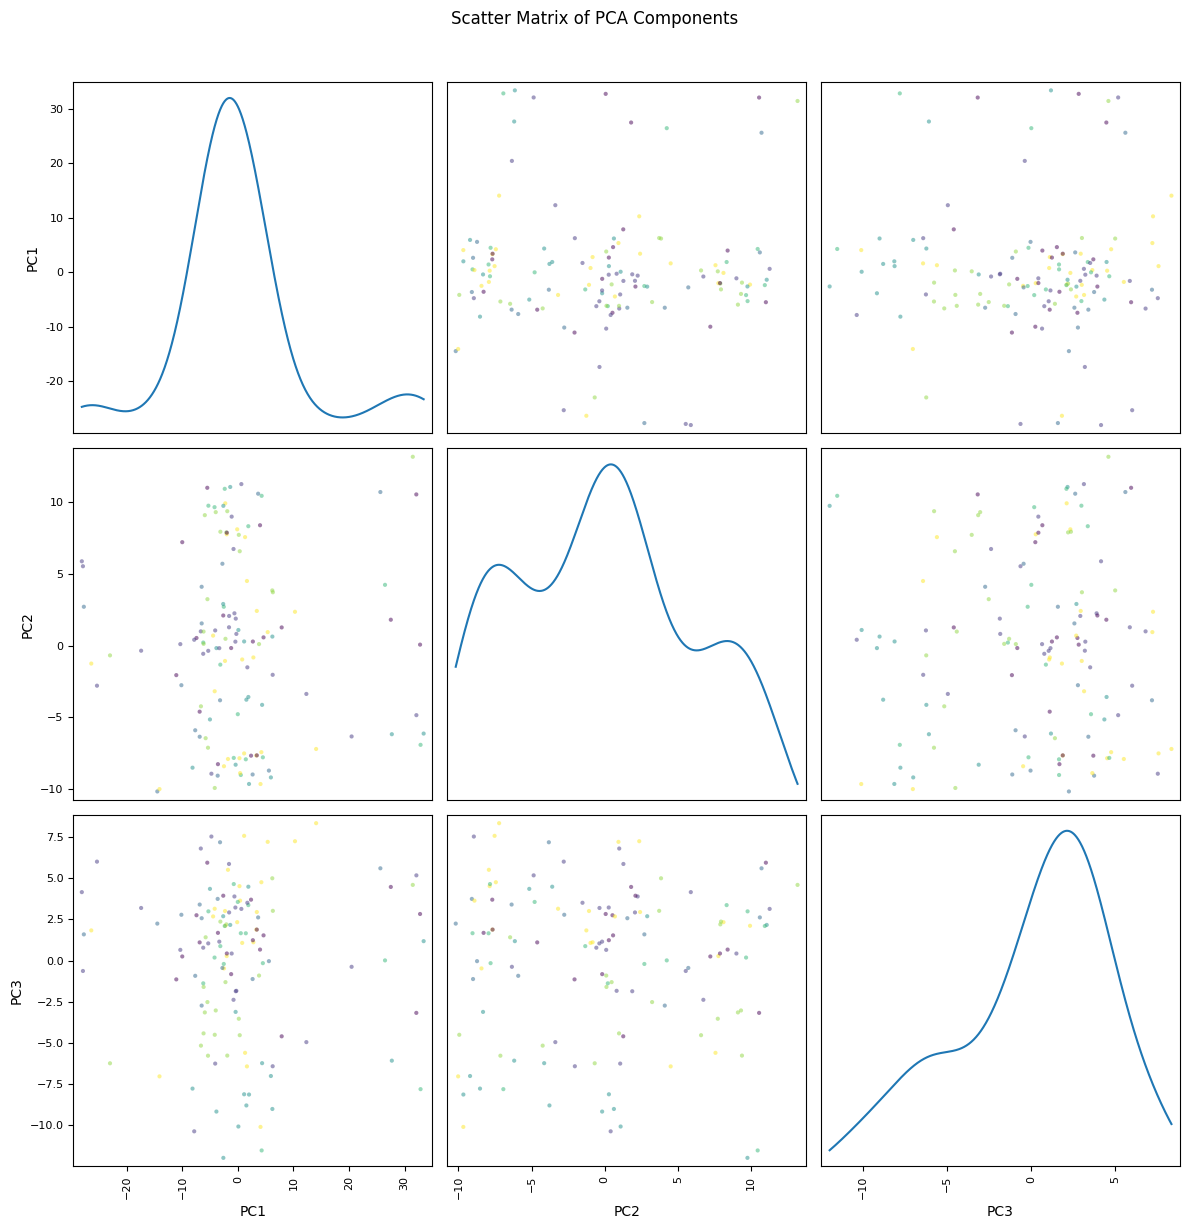

Persentase variance yang dijelaskan oleh setiap komponen:
PC1: 67.79%
PC2: 21.08%
PC3: 11.13%


In [ ]:
# Buat scatter plot dari hasil PCA
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1],
                     c=df_encode['Program Studi'],
                     cmap='viridis',
                     alpha=0.6)

# Tambahkan labels
plt.xlabel('First Principal Component (PC1)')
plt.ylabel('Second Principal Component (PC2)')
plt.title('PCA Scatter Plot')

# Tambahkan legend berdasarkan Program Studi asli
legend_labels = list(sorted(set(df_encode['Program Studi'])))
plt.legend(handles=scatter.legend_elements()[0],
          labels=legend_labels,
          title="Program Studi",
          bbox_to_anchor=(1.05, 1),
          loc='upper left')

# Tambahkan grid
plt.grid(True, linestyle='--', alpha=0.7)

# Sesuaikan layout agar legend tidak terpotong
plt.tight_layout()

plt.show()

# Buat scatter plot matrix untuk semua komponen
fig = plt.figure(figsize=(12, 12))
scatter_matrix = pd.plotting.scatter_matrix(pca_df,
                                          diagonal='kde',
                                          c=df_encode['Program Studi'],
                                          figsize=(12, 12),
                                          alpha=0.5)

plt.suptitle('Scatter Matrix of PCA Components', y=1.02)
plt.tight_layout()
plt.show()

# Tampilkan persentase variance yang dijelaskan
print("\
Persentase variance yang dijelaskan oleh setiap komponen:")
for i, var in enumerate(explained_variance, 1):
    print(f"PC{i}: {var*100:.2f}%")